# download csv

# load library

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import numpy as np

# load data

In [45]:
df = pd.read_csv('../csvs/eda_full.csv', encoding='utf-8-sig')
print("features:", df.columns)
df.head()

features: Index(['video', 'yt_id', 'duration', 'title', 'singer', 'audio', 'lyric',
       'year', 'submatch', 'match', 'tempo_transition_complexity',
       'active_bpm_variance', 'pitch_high', 'pitch_low', 'pitch_range',
       'rms_variation', 'repeat_area_size', 'repetition_ratio', 'key', 'scale',
       'strength', 'tempo_variance'],
      dtype='object')


,video,yt_id,duration,title,singer,audio,lyric,year,submatch,match,...,pitch_high,pitch_low,pitch_range,rms_variation,repeat_area_size,repetition_ratio,key,scale,strength,tempo_variance
0,BBIBBI (삐삐),BZqfL_2CzKg,3:15,BBIBBI,IU,Q1,Q2,2018,0,1,...,389.737708,65.406391,324.331317,0.022811,43598770,0.628099,G,major,0.894059,4.990564
1,Twenty-three (스물셋),GXNHaLIhyMY,3:15,스물셋,IU,Q1,Q2,2015,0,1,...,118.578040,65.406391,53.171649,0.018009,57895162,0.835059,C,minor,0.866802,1.552691
2,Jam Jam (잼잼),KWjDSRdIFgc,3:39,잼잼,IU,Q1,Q2,2017,0,1,...,169.643191,65.406391,104.236799,0.010053,47310732,0.540768,A,minor,0.964047,4.506091
3,다비치 (DAVICHI) - 너에게 못했던 내 마지막 말은 (Unspoken Wor...,inxtzi3d_0I,3:25,너에게 못했던 내 마지막 말은,다비치,Q1,Q3,2019,0,1,...,367.863412,65.406391,302.457020,0.015523,41192330,0.534291,D,major,0.903000,4.119712
4,시간아 멈춰라 (시간아 멈춰라),i-SBnhaZSSU,4:29,시간아 멈춰라,다비치,Q1,Q2,2010,0,1,...,926.957712,65.406391,861.551320,0.015707,32124936,0.241209,Bb,major,0.886979,1.986724


# split data

In [128]:
df0 = df[df['submatch'] == 0].copy()  # pn
df1 = df[df['submatch'] == 1].copy()  # np
df2 = df[df['submatch'] == 2].copy()  # pp
df3 = df[df['submatch'] == 3].copy()  # nn
df4 = df[df['match']==0].copy() # match
df5 = df[df['match']==1].copy() # mismatch

In [47]:
len(df0), len(df1), len(df2), len(df3), len(df4), len(df5)

(31, 30, 31, 31, 62, 61)

# feature analysis

In [131]:
def create_kde_plot(dfs, labels, value_cols, colors):
  n_rows, n_cols = 3, 3
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex=False, sharey=False)
  axes = axes.flatten()


  for ax, col in zip(axes, value_cols):
      for df, label, color in zip(dfs, labels, colors):
          try:
              df[col].plot.kde(
                  ax=ax,
                  color=color,
                  linewidth=2,
                  label=label,
                  bw_method=0.5
              )
              x = ax.lines[-1].get_xdata()
              y = ax.lines[-1].get_ydata()
              ax.fill_between(x, y, color=color, alpha=0.3)

          except Exception as e:
              print(f"Skipping {col} ({label}) due to KDE error: {e}")
              continue

      ax.set_title(col)
      ax.set_xlabel(col)


  for i, ax in enumerate(axes):
      if i % n_cols == 0:
          ax.set_ylabel('Density')
      else:
          ax.set_ylabel('')


  axes[0].legend(title='group')

  plt.tight_layout()
  plt.show()

In [129]:
dfs = [df0, df1, df2, df3]
labels4 = ['pn', 'np', 'pp', 'nn']
colors4  = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green']

In [ ]:
value_cols = ['tempo_transition_complexity',
  'active_bpm_variance',
  'pitch_range',
  'rms_variation',
  'repeat_area_size',
  'repetition_ratio',
  'tempo_variance']

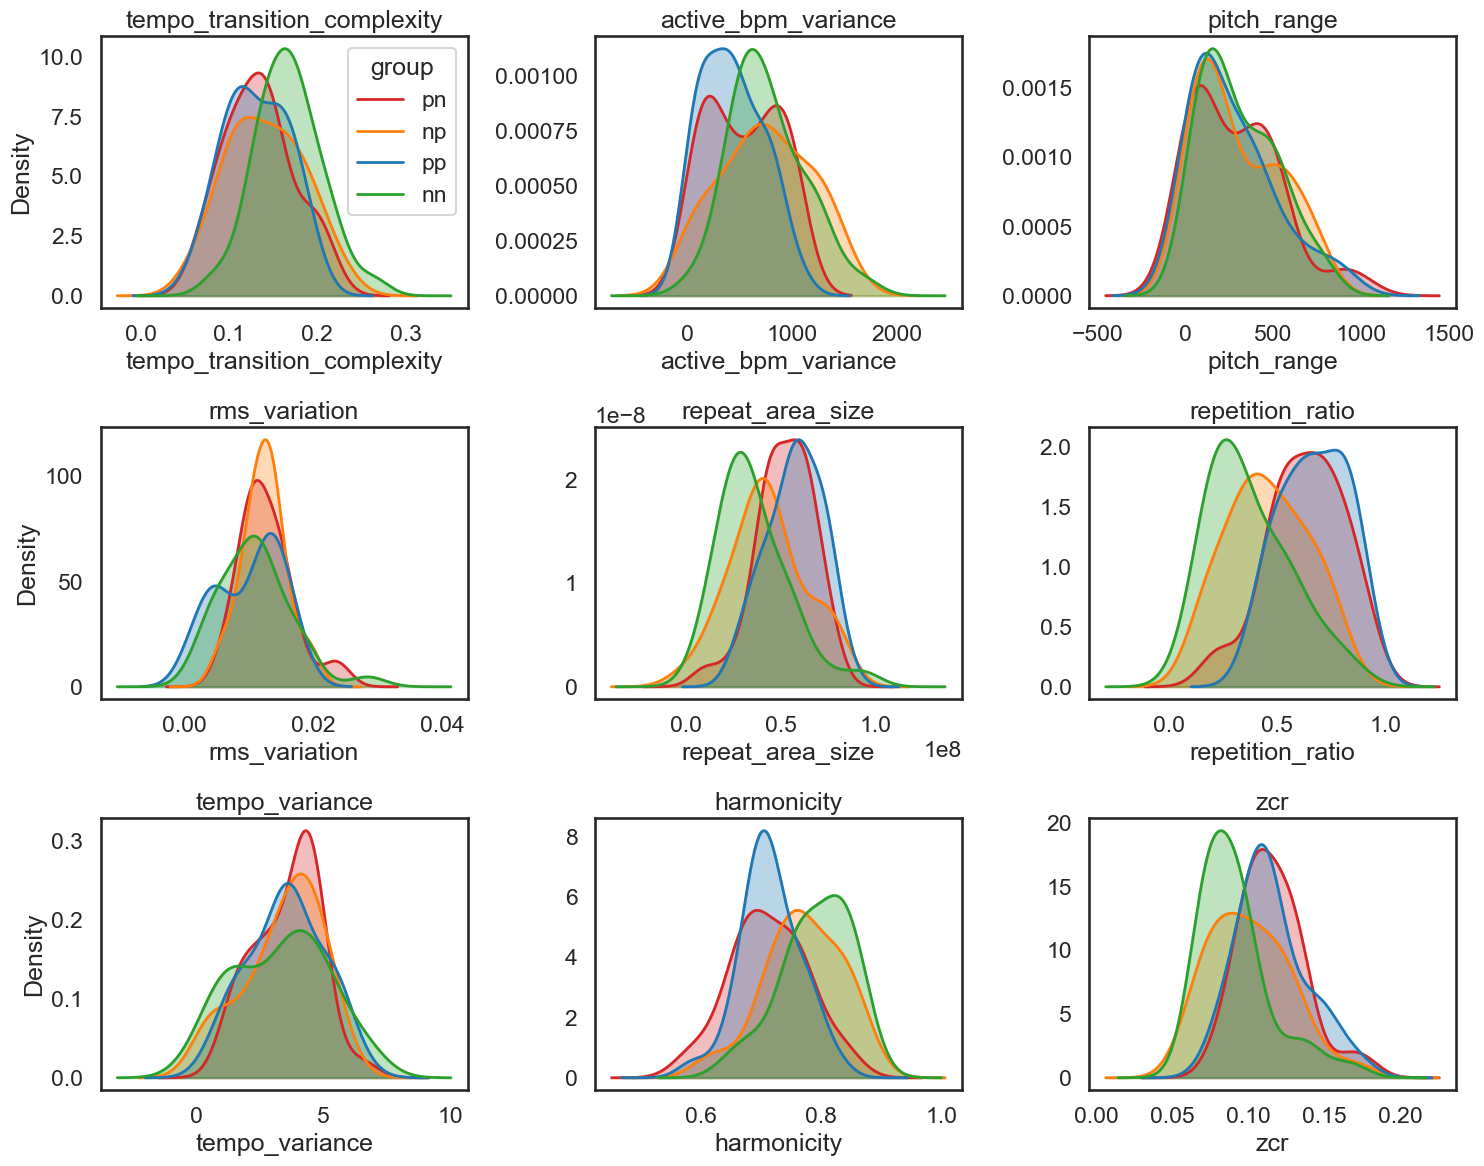

In [ ]:
value_cols = ['tempo_transition_complexity',
  'active_bpm_variance',
  'pitch_range',
  'rms_variation',
  'repeat_area_size',
  'repetition_ratio',
  'tempo_variance',
  'harmonicity', # harmonic 성분의 에너지 비율
  'zcr' # 영점교차율
  ]
create_kde_plot(dfs=dfs, labels=labels4, value_cols=value_cols, colors=colors4)

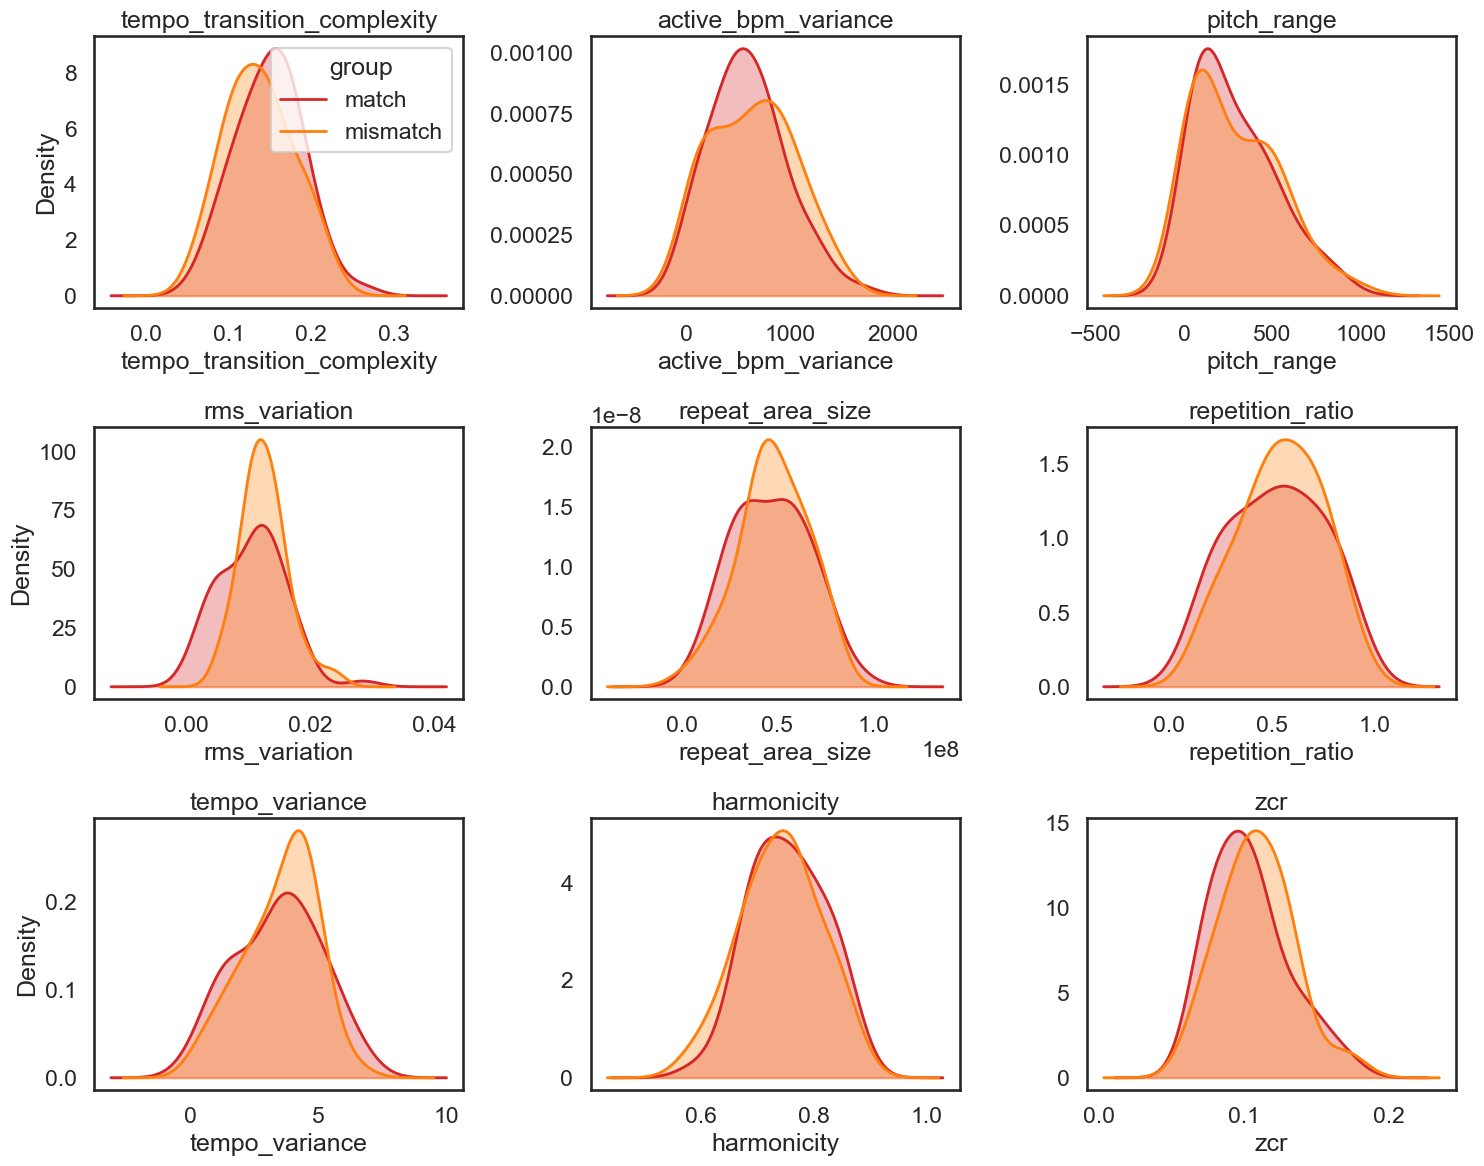

In [133]:
dfs = [df4, df5]
labels2 = ['match', 'mismatch']
colors2  = ['tab:red', 'tab:orange']
create_kde_plot(dfs=dfs, labels=labels2, value_cols=value_cols, colors=colors2)

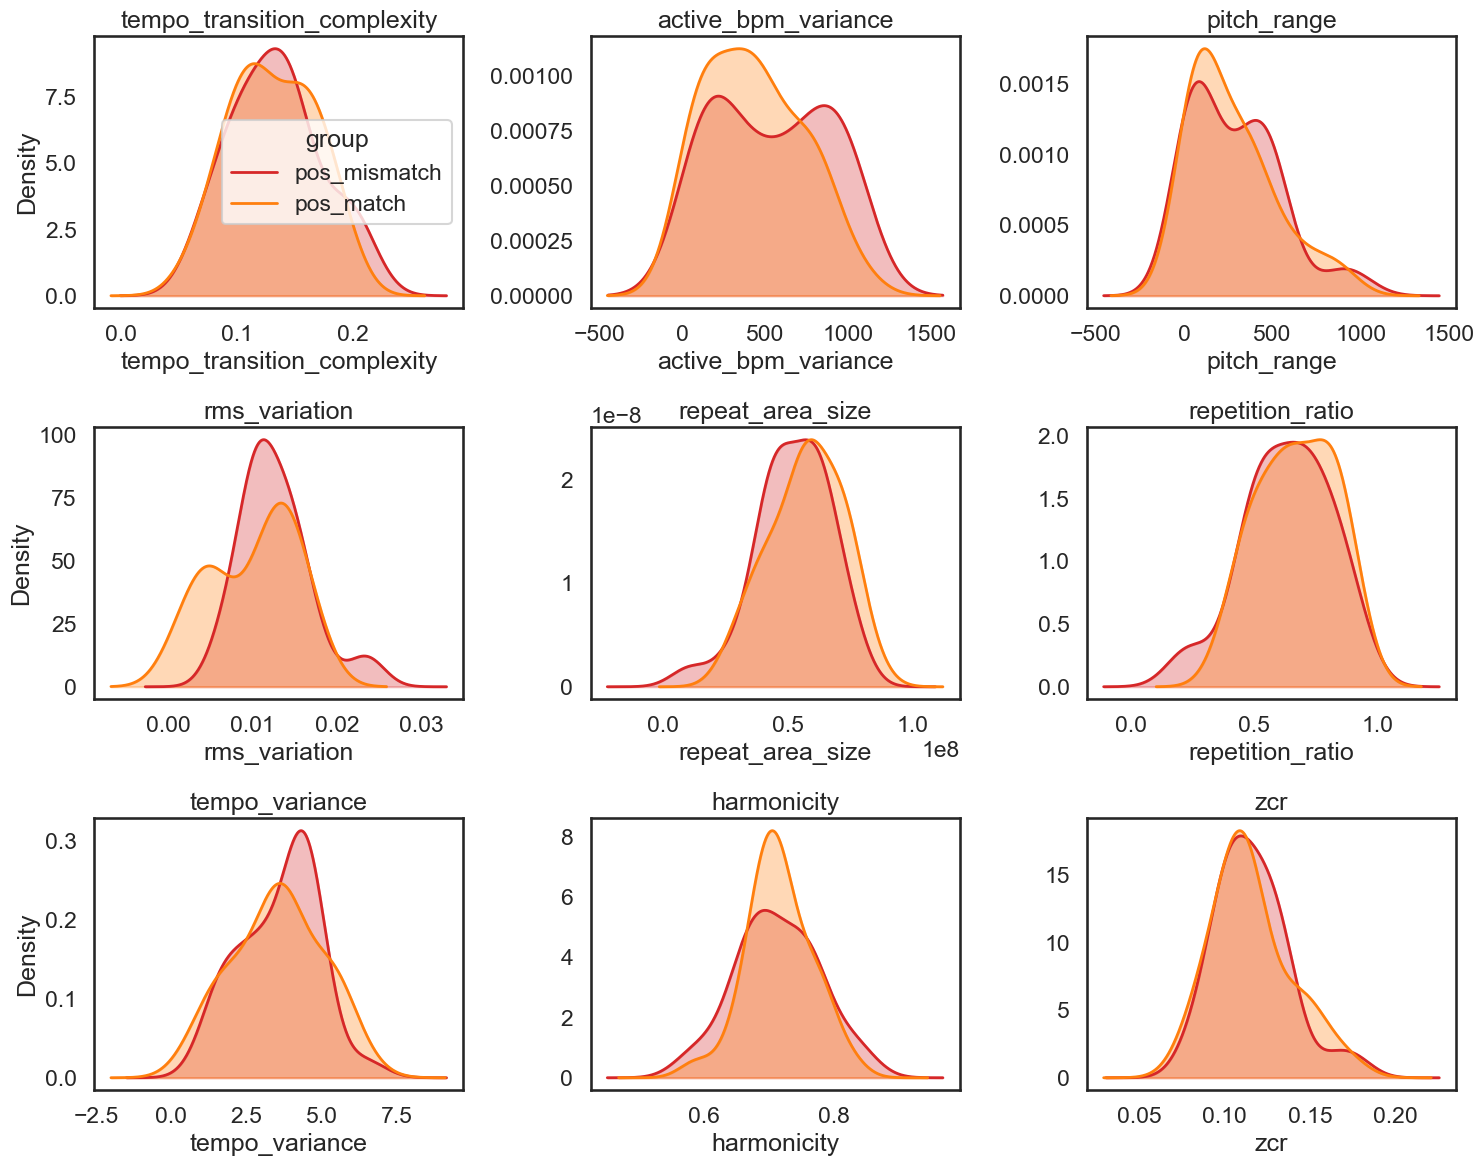

In [134]:
dfs = [df0, df2]
labels2 = ['pos_mismatch', 'pos_match']
colors2  = ['tab:red', 'tab:orange']
create_kde_plot(dfs=dfs, labels=labels2, value_cols=value_cols, colors=colors2)

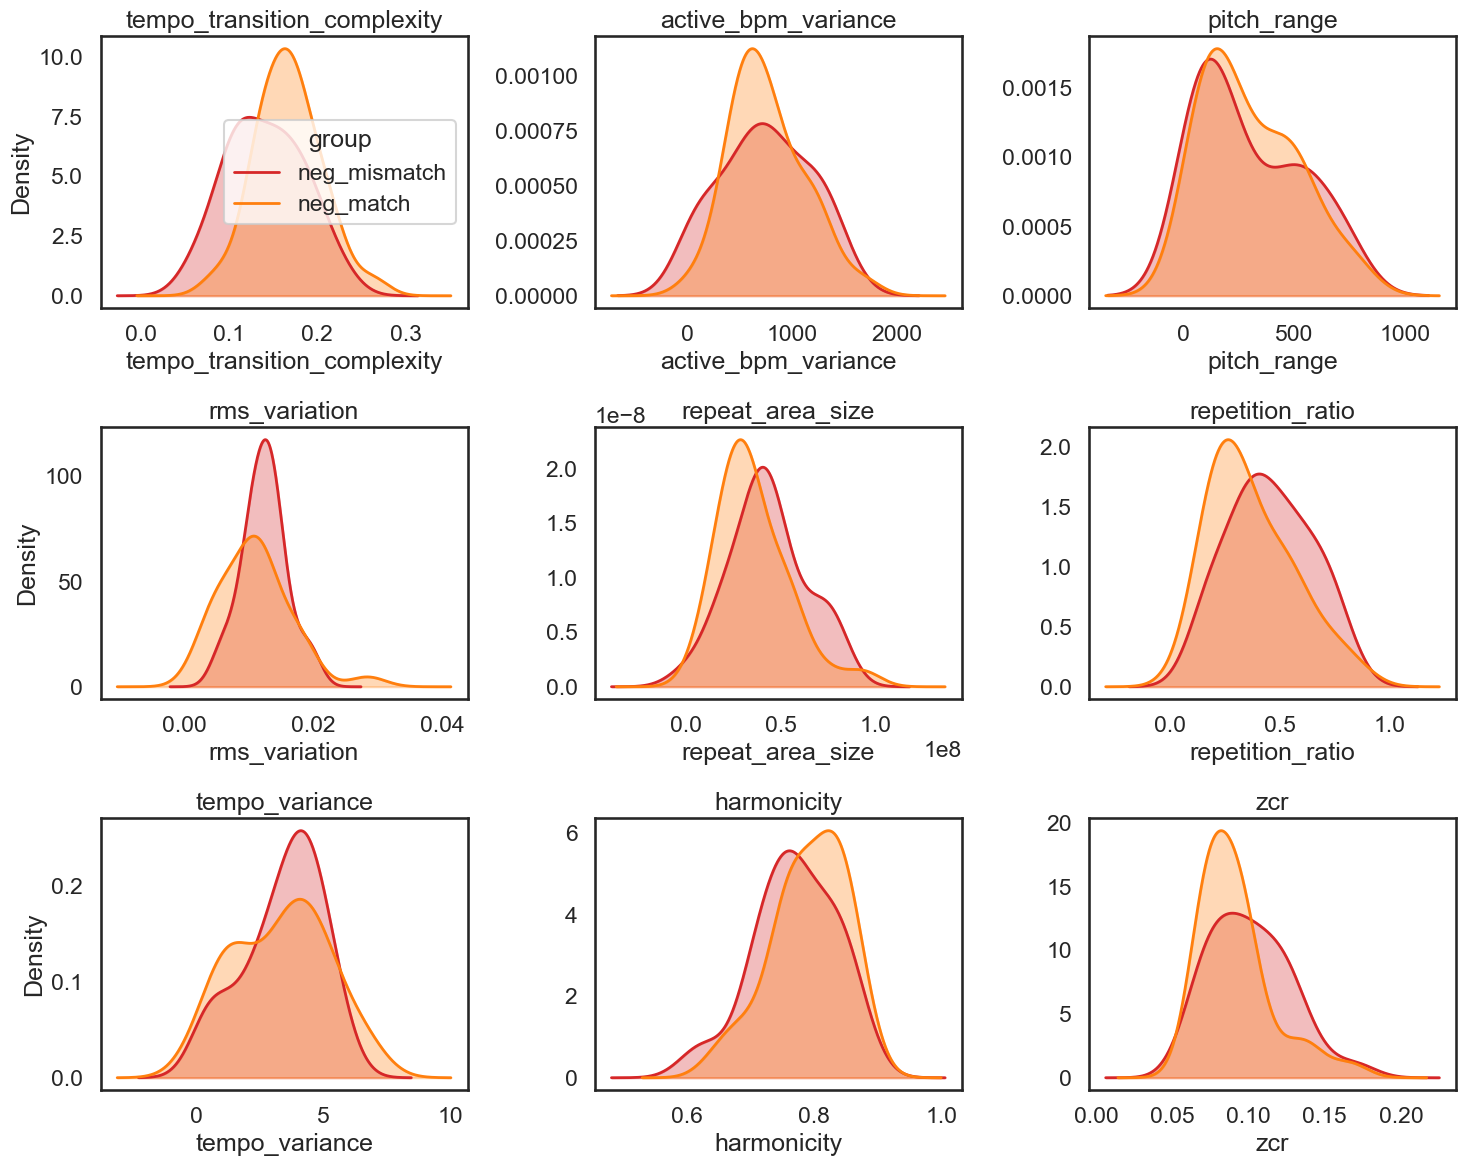

In [135]:
dfs = [df1, df3]
labels2 = ['neg_mismatch', 'neg_match']
colors2  = ['tab:red', 'tab:orange']
create_kde_plot(dfs=dfs, labels=labels2, value_cols=value_cols, colors=colors2)

# mean self-similarity matrix

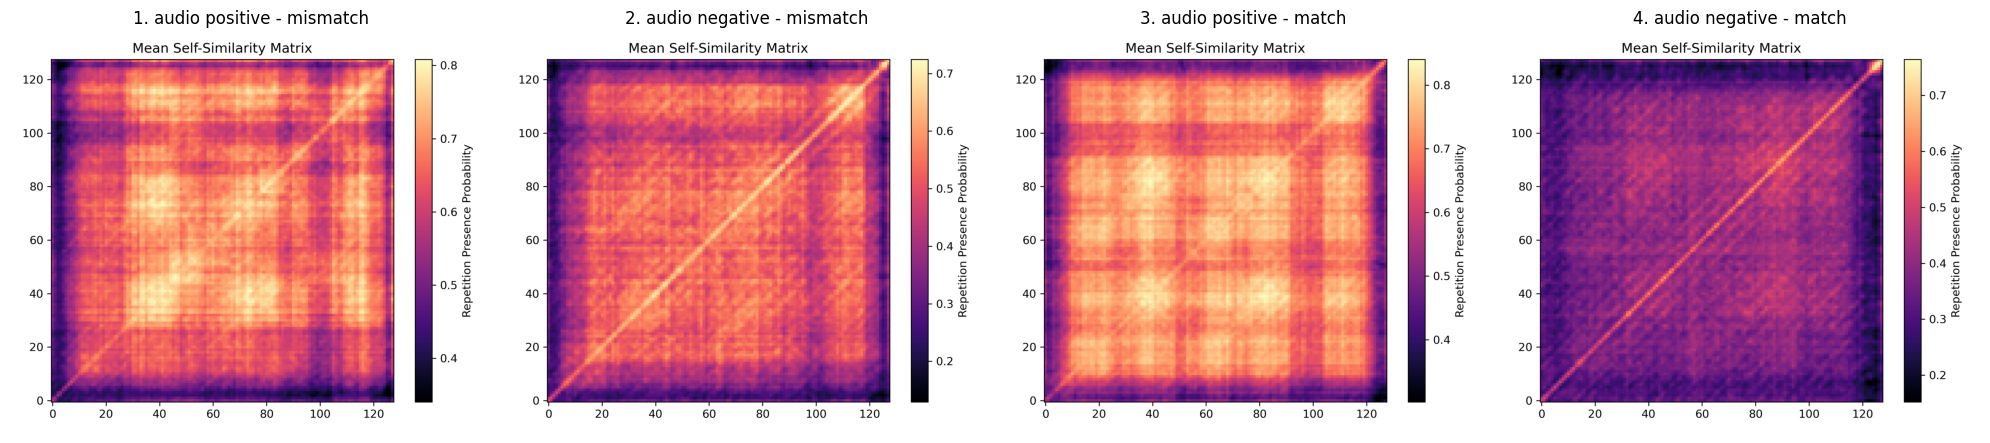

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

file_paths = ['0.png', '1.png', '2.png', '3.png']
titles = ['1. audio positive - mismatch', '2. audio negative - mismatch', '3. audio positive - match', '4. audio negative - match']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (path, title) in enumerate(zip(file_paths, titles)):
    img = mpimg.imread(path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(title, fontsize=12)

plt.tight_layout()
plt.show()

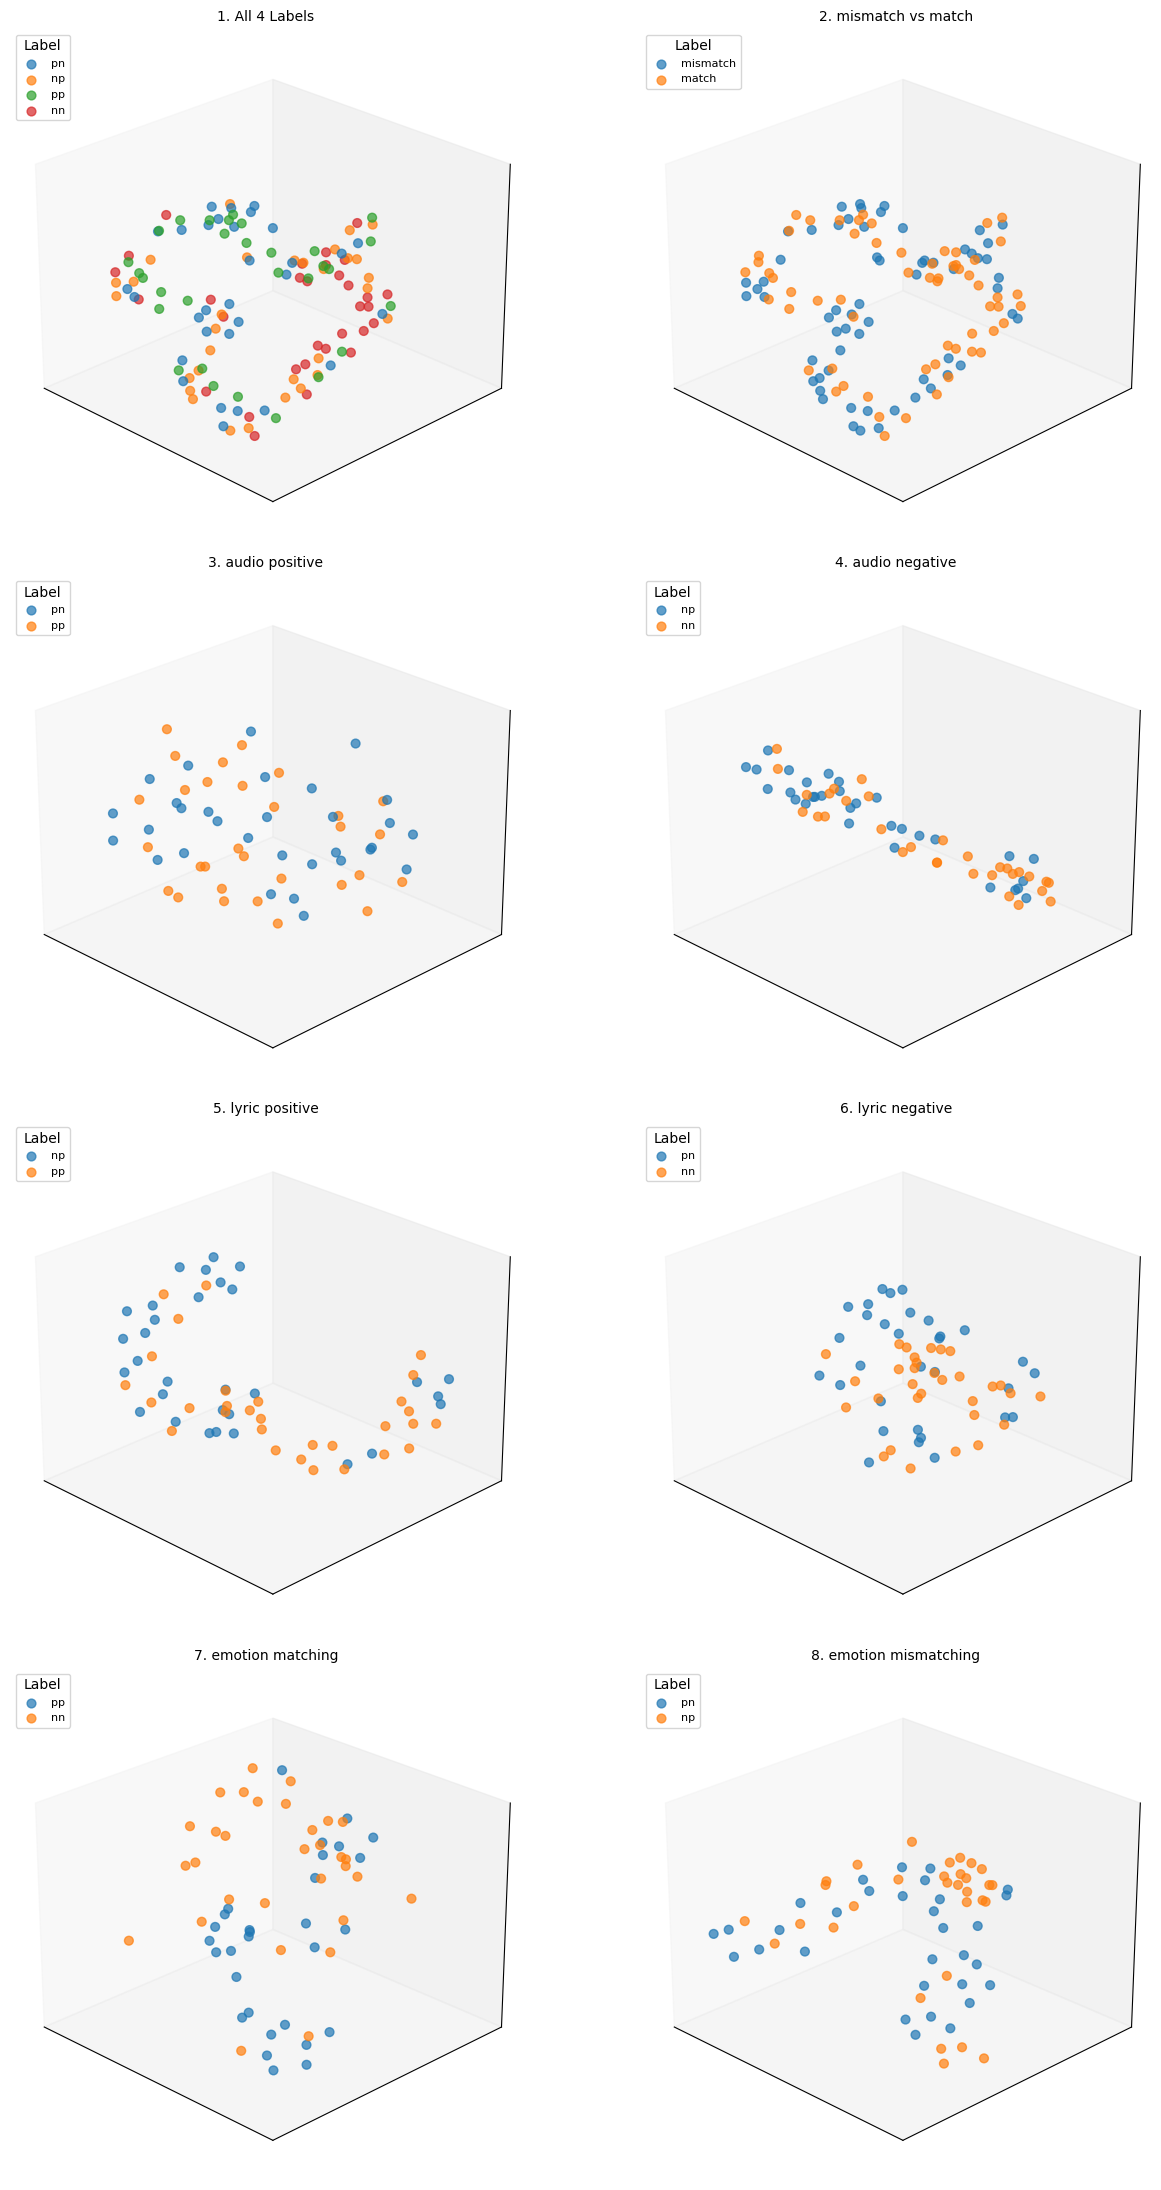

In [172]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

value_cols = ['tempo_variance', 'pitch_high', 'pitch_low', 'rms_variation',
              'repetition_ratio', 'repeat_area_size', 'active_bpm_variance',
              'tempo_transition_complexity', 'pitch_range']

def plot_tsne_3d_grid_2x4():
    plots = [
        ([df0, df1, df2, df3], ['pn', 'np', 'pp', 'nn'], "1. All 4 Labels"),
        ([df5, df4], ['mismatch', 'match'], "2. mismatch vs match"),
        ([df0, df2], ['pn', 'pp'], "3. audio positive"),
        ([df1, df3], ['np', 'nn'], "4. audio negative"),
        ([df1, df2], ['np', 'pp'], "5. lyric positive"),
        ([df0, df3], ['pn', 'nn'], "6. lyric negative"),
        ([df2, df3], ['pp', 'nn'], "7. emotion matching"),
        ([df0, df1], ['pn', 'np'], "8. emotion mismatching")
    ]

    fig = plt.figure(figsize=(14, 22))
    for i, (dfs, label_list, title) in enumerate(plots):
        df_all = pd.concat(dfs).copy()
        df_all = df_all.dropna(subset=value_cols)
        if df_all.empty or df_all.shape[0] < 2:
            print(f"[SKIPPED] {title} - insufficient data.")
            continue

        label_column = []
        for df, label in zip(dfs, label_list):
            label_column += [label] * len(df)
        df_all['label'] = label_column
        X = df_all[value_cols]
        y = df_all['label']

        tsne = TSNE(n_components=3, perplexity=10, random_state=42)
        X_tsne = tsne.fit_transform(X)

        ax = fig.add_subplot(4, 2, i + 1, projection='3d')
        for label in label_list:
            idx = df_all['label'] == label
            ax.scatter(X_tsne[idx, 0], X_tsne[idx, 1], X_tsne[idx, 2],
                       label=label, s=40, alpha=0.7)

        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
        ax.view_init(elev=25, azim=135)

        ax.legend(title="Label", fontsize=8, loc='upper left')

    plt.tight_layout()
    plt.show()

plot_tsne_3d_grid_2x4()

# key signature

In [191]:
df.columns

Index(['video', 'yt_id', 'duration', 'title', 'singer', 'audio', 'lyric',
       'year', 'match', 'pn', 'tempo_transition_complexity',
       'active_bpm_variance', 'pitch_high', 'pitch_low', 'pitch_range',
       'rms_variation', 'repeat_area_size', 'repetition_ratio', 'key', 'scale',
       'strength', 'tempo_variance', 'key_signature'],
      dtype='object')

In [192]:
df['key'].unique()

array(['G', 'C', 'A', 'D', 'Bb', 'E', 'C#', 'F', 'F#', 'Eb', 'Ab', 'B'],
      dtype=object)

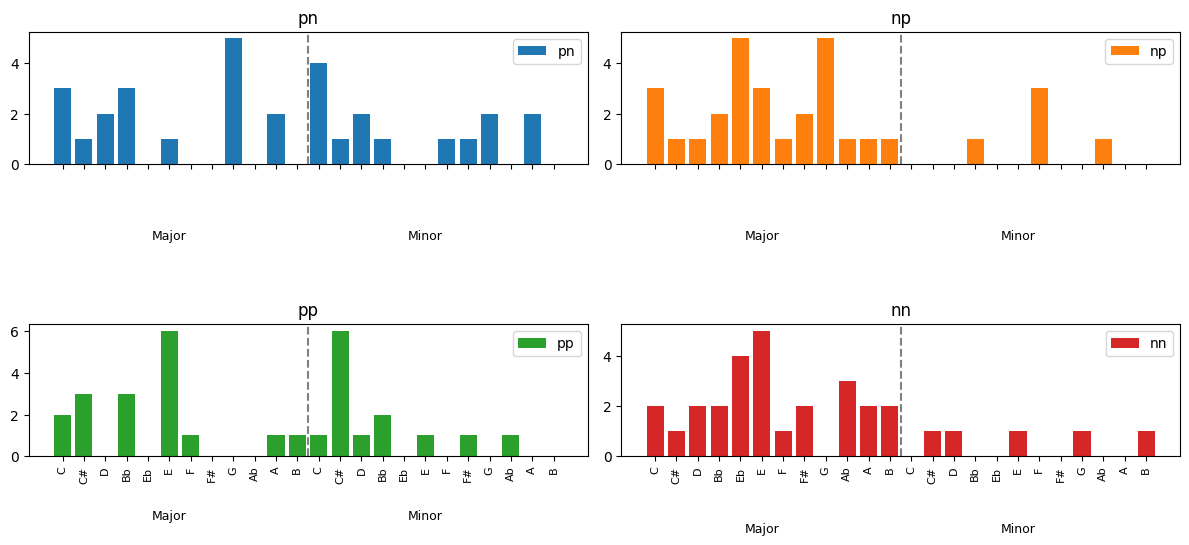

In [193]:
import matplotlib.pyplot as plt

key_list = ['C', 'C#', 'D', 'Bb', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'B']
key_labels = key_list + key_list

dfs = [df0, df1, df2, df3]
labels = ['pn', 'np', 'pp', 'nn']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
axs = axs.flatten()

for i, (df, label, color) in enumerate(zip(dfs, labels, colors)):
    major_counts = df[df['scale'] == 'major']['key'].value_counts()
    minor_counts = df[df['scale'] == 'minor']['key'].value_counts()

    major_vals = [major_counts.get(k, 0) for k in key_list]
    minor_vals = [minor_counts.get(k, 0) for k in key_list]
    counts = major_vals + minor_vals

    axs[i].bar(range(24), counts, color=color, label=label)
    axs[i].set_title(label)
    axs[i].legend()
    axs[i].set_xticks(range(24))
    axs[i].set_xticklabels(key_labels, rotation=90, fontsize=8)

    axs[i].axvline(11.5, color='gray', linestyle='--')
    axs[i].text(5, -3, 'Major', ha='center', fontsize=9)
    axs[i].text(17, -3, 'Minor', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [13]:
df['audio'].value_counts()

audio
Q1    56
Q3    54
Q2     7
Q4     6
Name: count, dtype: int64

In [14]:
df['lyric'].value_counts()

lyric
Q3    41
Q1    40
Q2    22
Q4    20
Name: count, dtype: int64

In [15]:
q1 = df[df['audio']=='Q1']
q2 = df[df['audio']=='Q2']
q3 = df[df['audio']=='Q3']
q4 = df[df['audio']=='Q4']

In [23]:
def plot_q4(dfs):
  key_list   = ['C', 'C#', 'D', 'Bb', 'Eb', 'E', 'F', 'F#',
                'G', 'Ab', 'A', 'B']
  key_labels = key_list + key_list
  labels = ['q1 : positive & high energy', 'q2 : negative & high energy', 'q3 : negative & low energy', 'q4 : positive & low energy']
  colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

  fig, axs = plt.subplots(2, 2, figsize=(16, 8))
  axs = axs.ravel()

  global_max = 0
  for df in dfs:
      counts = np.concatenate([
          df[df['scale'] == 'major']['key'].value_counts()
            .reindex(key_list, fill_value=0).values,
          df[df['scale'] == 'minor']['key'].value_counts()
            .reindex(key_list, fill_value=0).values
      ])
      global_max = max(global_max, counts.max())
  y_top = global_max * 1.15

  bar_width = 0.7
  for ax, df, title, c in zip(axs, dfs, labels, colors):
      major_vals = df[df['scale'] == 'major']['key'] \
                    .value_counts().reindex(key_list,
                                            fill_value=0).values
      minor_vals = df[df['scale'] == 'minor']['key'] \
                    .value_counts().reindex(key_list,
                                            fill_value=0).values
      counts = np.concatenate([major_vals, minor_vals])

      ax.bar(np.arange(24), counts,
            width=bar_width, color=c, edgecolor='black')
      ax.set_title(title)
      ax.set_ylim(0, y_top)
      ax.set_xticks(np.arange(24))
      ax.set_xticklabels(key_labels, rotation=90, fontsize=8)
      ax.axvline(11.5, color='gray', linestyle='--', lw=1)
      ax.text(5.5,  -y_top*0.07, 'Major', ha='center', va='top')
      ax.text(17.5, -y_top*0.07, 'Minor', ha='center', va='top')

  plt.subplots_adjust(wspace=0.25, hspace=0.35)
  plt.show()


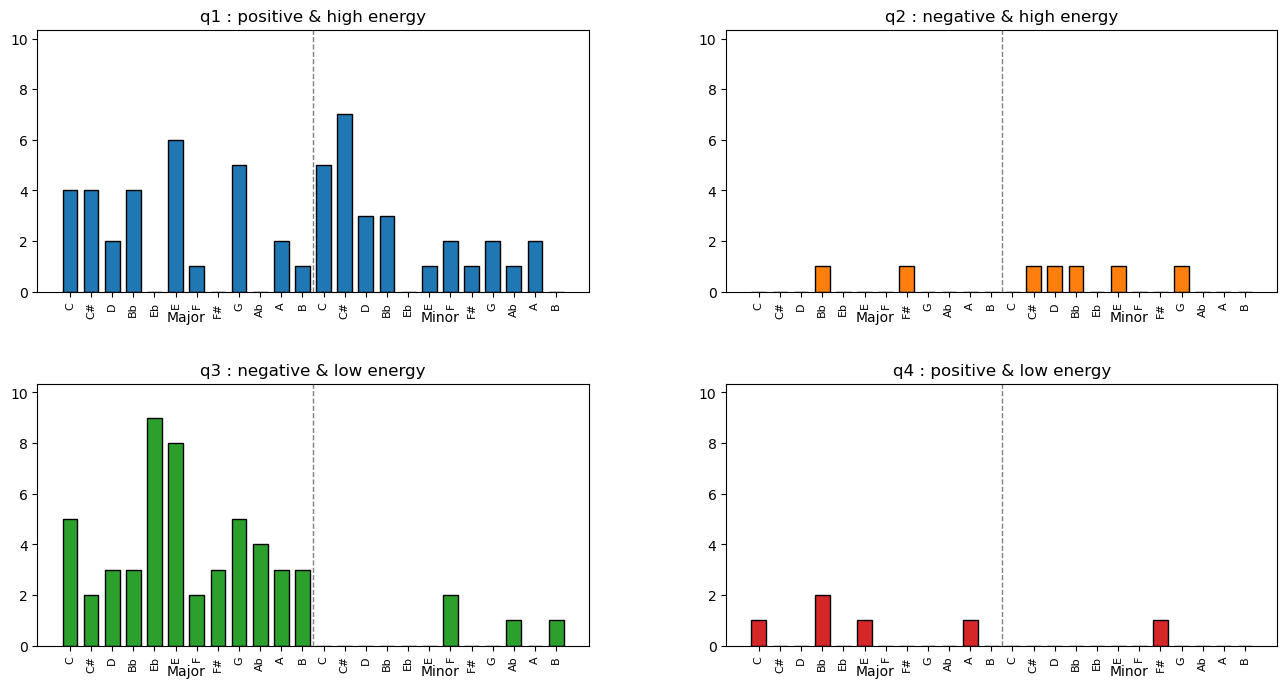

In [24]:
plot_q4([q1, q2, q3, q4])

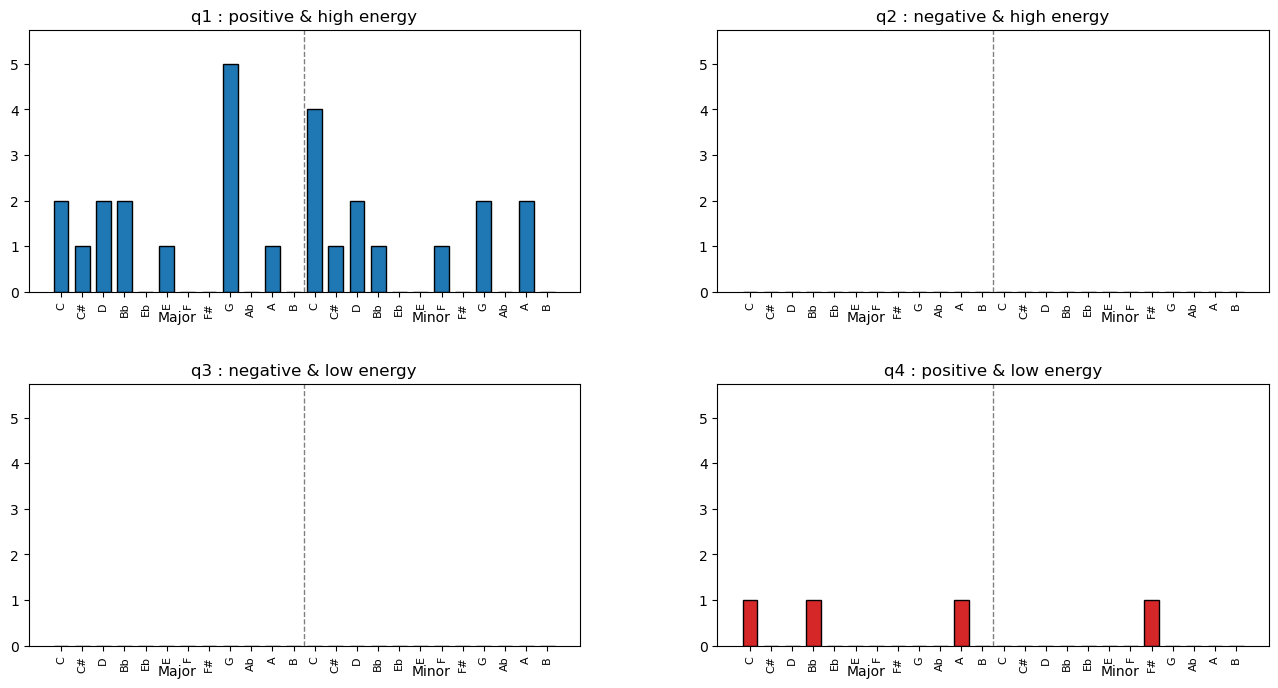

In [ ]:
q1 = df0[df0['audio']=='Q1']
q2 = df0[df0['audio']=='Q2']
q3 = df0[df0['audio']=='Q3']
q4 = df0[df0['audio']=='Q4']
plot_q4([q1, q2, q3, q4])
# G, C

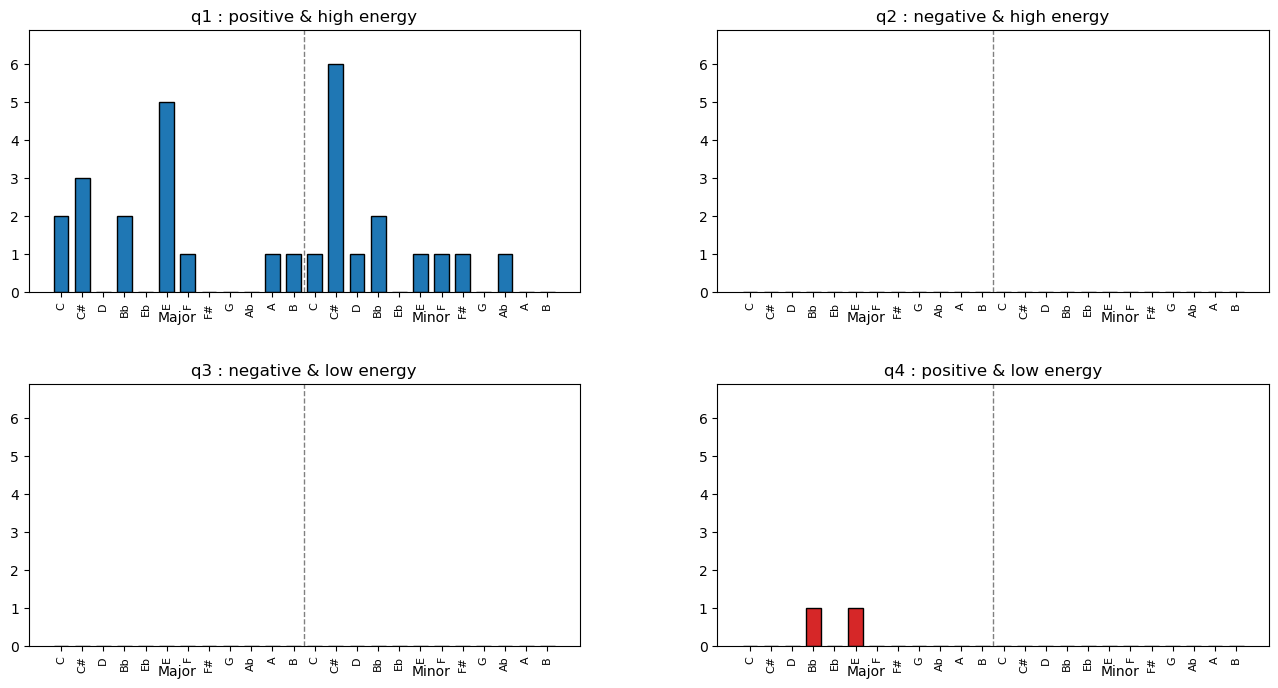

In [ ]:
q1 = df2[df2['audio']=='Q1']
q2 = df2[df2['audio']=='Q2']
q3 = df2[df2['audio']=='Q3']
q4 = df2[df2['audio']=='Q4']
plot_q4([q1, q2, q3, q4])
# E, C#

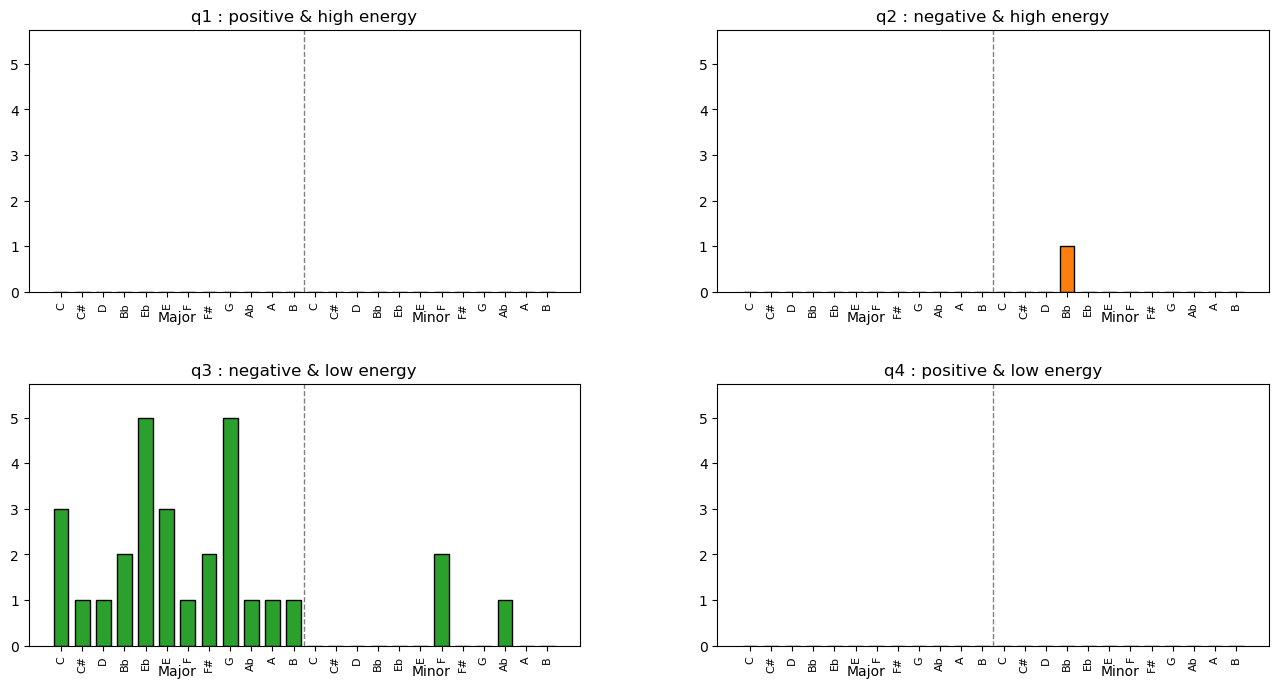

In [ ]:
q1 = df1[df1['audio']=='Q1']
q2 = df1[df1['audio']=='Q2']
q3 = df1[df1['audio']=='Q3']
q4 = df1[df1['audio']=='Q4']
plot_q4([q1, q2, q3, q4])
# Eb, G

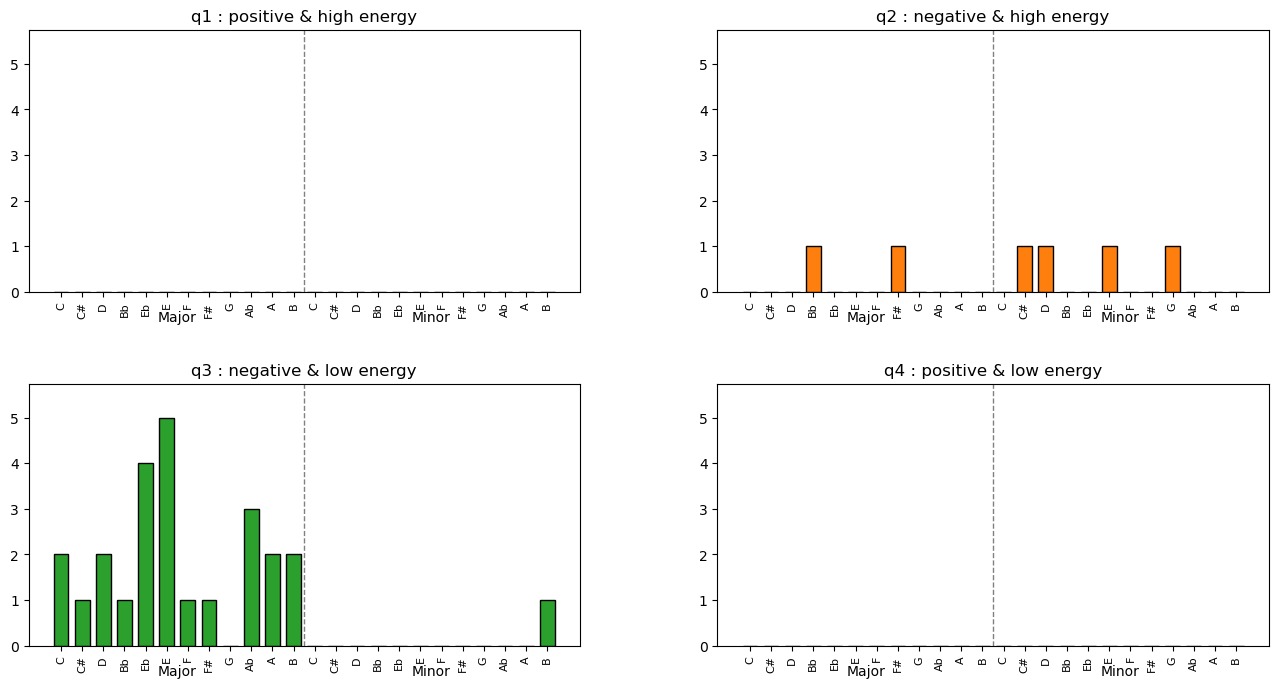

In [ ]:
q1 = df3[df3['audio']=='Q1']
q2 = df3[df3['audio']=='Q2']
q3 = df3[df3['audio']=='Q3']
q4 = df3[df3['audio']=='Q4']
plot_q4([q1, q2, q3, q4])
# Eb, E

# 결과 및 추후 계획

- 단순 분포, 값 차이 미미
- 구조적 분석 비교 필요
- 데이터셋 다시 구축 : 주관 적게 들어가도록
- 오토인코더로 새로운 피쳐 생성

---

In [ ]:
def plot_bar_subplots(dfs, labels, feature_prefix, title=None, colors=None):
    feature_map = {
        'chroma_': [f'chroma_{i}' for i in range(12)],
        'mfcc_': [f'mfcc_{i}' for i in range(13)],
        'contrast_': [f'contrast_{i}' for i in range(7)],
    }

    if feature_prefix not in feature_map:
        raise ValueError(f"Invalid feature prefix: {feature_prefix}")

    feature_cols = feature_map[feature_prefix]
    feature_names = [col.replace(feature_prefix, '') for col in feature_cols]
    n_features = len(feature_cols)

    fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharey=True)
    axes = axes.flatten()

    if colors is None:
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red

    for i, (df, label) in enumerate(zip(dfs, labels)):
        if not set(feature_cols).issubset(df.columns):
            raise ValueError(f"Some expected columns are missing in df[{label}]")
        
        mean_values = df[feature_cols].mean().values  # (n_features,)
        if mean_values.shape[0] != n_features:
            raise ValueError(f"Expected {n_features} features, got {mean_values.shape[0]}")

        ax = axes[i]
        ax.bar(np.arange(n_features), mean_values, color=colors[i], alpha=0.85, label=label)
        ax.set_xticks(np.arange(n_features))
        ax.set_xticklabels(feature_names, rotation=45)
        ax.set_title(label)
        ax.legend()

    plt.suptitle(title or f"{feature_prefix.upper()} mean by group", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


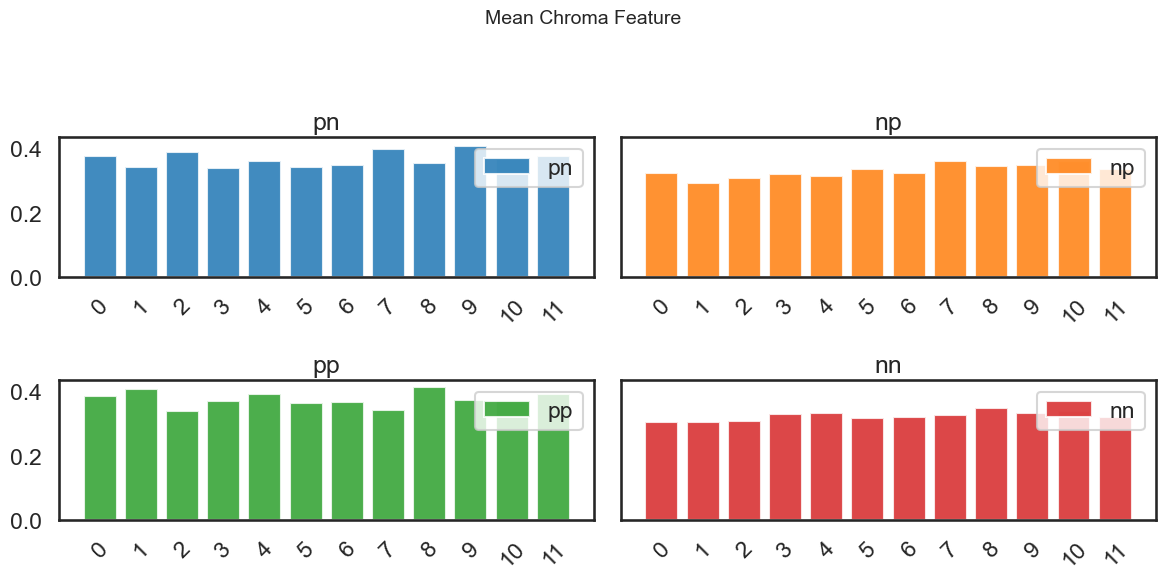

In [139]:
# scale
plot_bar_subplots(
    dfs=[df0, df1, df2, df3],
    labels=['pn', 'np', 'pp', 'nn'],
    feature_prefix='chroma_',
    title="Mean Chroma Feature"
)

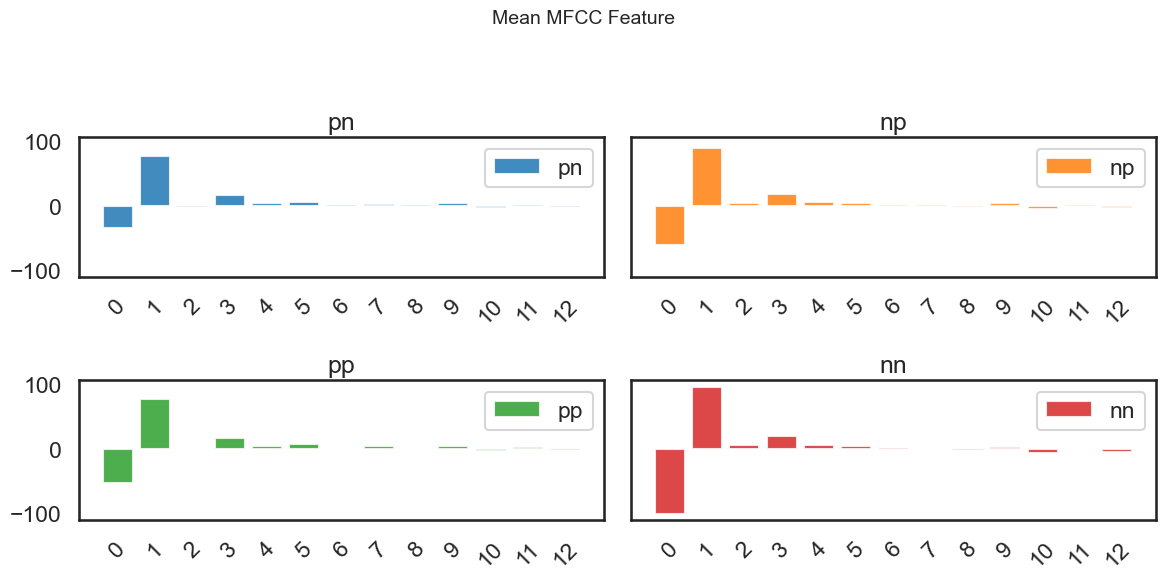

In [140]:
# timebre
plot_bar_subplots(
    dfs=[df0, df1, df2, df3],
    labels=['pn', 'np', 'pp', 'nn'],
    feature_prefix='mfcc_',
    title="Mean MFCC Feature"
)

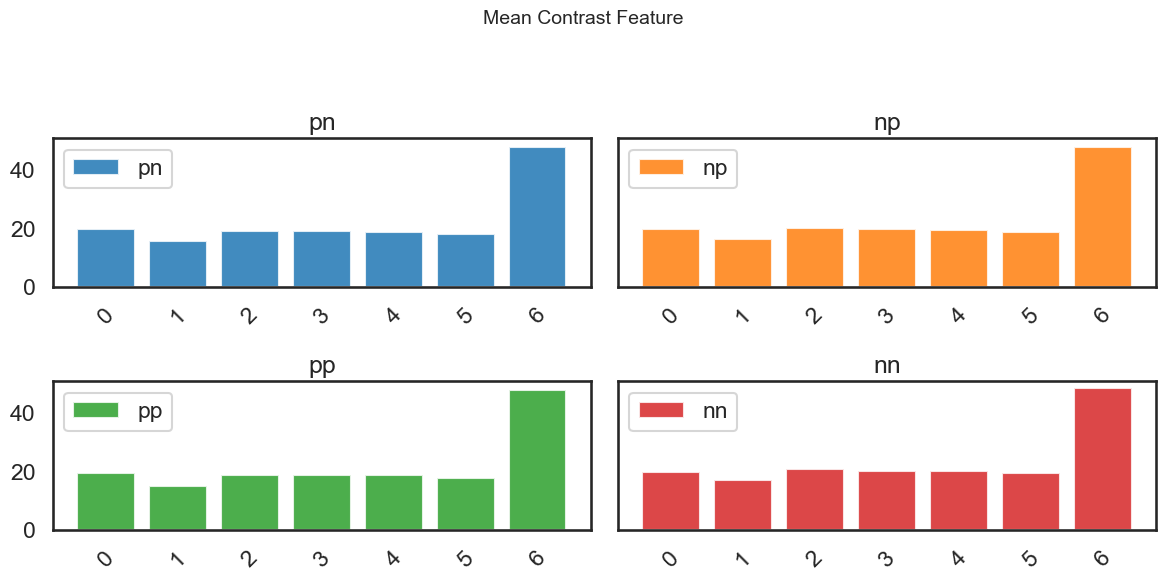

In [ ]:
# spectral_contrast
plot_bar_subplots(
    dfs=[df0, df1, df2, df3],
    labels=['pn', 'np', 'pp', 'nn'],
    feature_prefix='contrast_',
    title="Mean Contrast Feature"
)